1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

# Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

import warnings
warnings.filterwarnings("ignore", message="Your warning message here")

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Dataset /Machine Learning/TravelInsurancePrediction.csv")
print(df.shape)
df.head()

(1987, 10)


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'FamilyMembers'}>],
       [<Axes: title={'center': 'ChronicDiseases'}>,
        <Axes: title={'center': 'TravelInsurance'}>]], dtype=object)

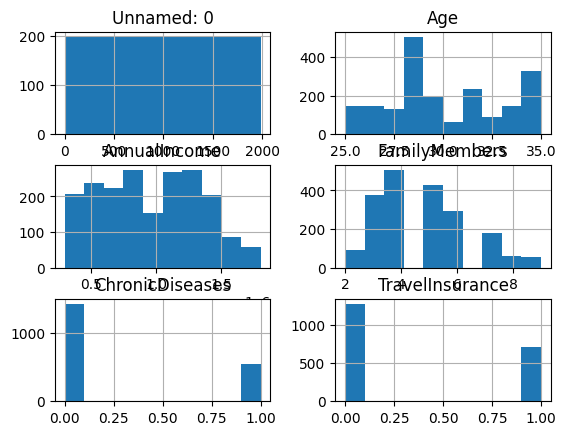

In [ ]:
df.hist()

# EDA and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df[df.duplicated()]

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


Seem likes dataset is kinda clean, neither missing nor duplicate values

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(
    df, title="Pandas Profiling Report dataset"
)
profile.to_notebook_iframe()

<ipython-input-22-58f2df9bf9b7>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Seem likes numerical features have no outlier or skew distribution much

In [ ]:
df.describe(include = ['object'])

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


Categorical features are have 2 unique values, the frequent value have large portion in total values but its not a imbalanced data

In [ ]:
print(df['Unnamed: 0'].unique())
df['Unnamed: 0'].nunique()

[   0    1    2 ... 1984 1985 1986]


1987

This 'Unnamed: 0' column look likes the index out row. Its redundant so we drop it

In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [35]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
categorical_cols.extend(['TravelInsurance', 'ChronicDiseases'])
categorical_cols = np.array(categorical_cols).reshape(2,3)
#Because of ChronicDiseases and TravelInsurance are categorical have already been encoded
# So I'll take them in categorical_cols and remove in numerical_cols

numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
numerical_cols.remove('TravelInsurance')
numerical_cols.remove('ChronicDiseases')
numerical_cols = np.array(numerical_cols).reshape(1, 3)
# I want reshape these cols to plot it looks more better
categorical_cols, numerical_cols

(array([['Employment Type', 'GraduateOrNot', 'FrequentFlyer'],
        ['EverTravelledAbroad', 'TravelInsurance', 'ChronicDiseases']],
       dtype='<U19'),
 array([['Age', 'AnnualIncome', 'FamilyMembers']], dtype='<U13'))

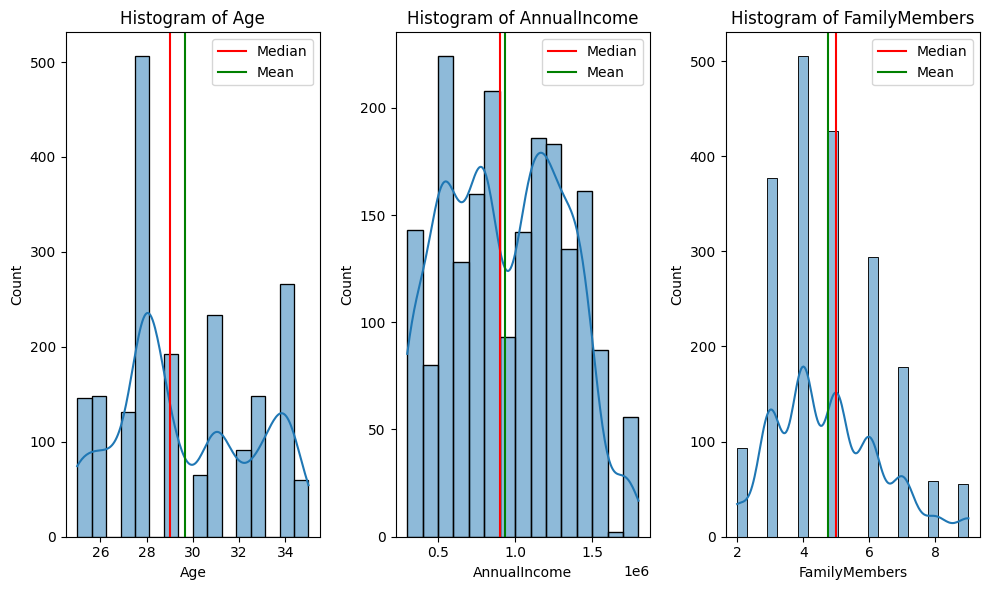

In [36]:
fig, ax = plt.subplots(numerical_cols.shape[0], numerical_cols.shape[1], figsize = (10, 6))

for i in range(numerical_cols.shape[0]):
    for j in range(numerical_cols.shape[1]):
        if numerical_cols[i, j] == '':
            continue
        sns.histplot(data = df, x = numerical_cols[i, j], ax = ax[j], kde = True)
        ax[j].set_title('Histogram of ' + numerical_cols[i,j])
        ax[j].axvline(x = df[numerical_cols[i, j]].median(), color = 'red', label = 'Median')
        ax[j].axvline(x = df[numerical_cols[i, j]].mean(), color = 'green', label = 'Mean')
        ax[j].legend()

plt.tight_layout()
plt.show()

Even mean and median are different but distribution of these features are not skew much and the values are correct with there description so maybe we dont have to transformation these features

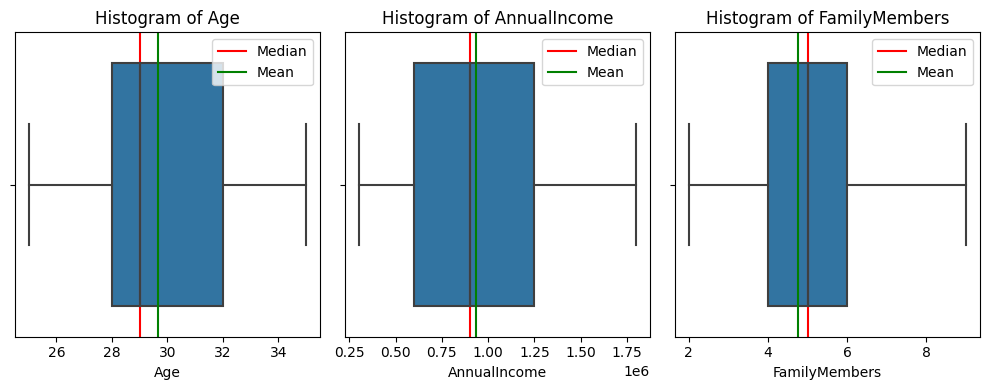

In [ ]:
fig, ax = plt.subplots(numerical_cols.shape[0], numerical_cols.shape[1], figsize = (10, 4))

for i in range(numerical_cols.shape[0]):
    for j in range(numerical_cols.shape[1]):
        if numerical_cols[i, j] == '':
            continue
        sns.boxplot(data = df, x = numerical_cols[i, j], ax = ax[j])
        ax[j].set_title('Histogram of ' + numerical_cols[i,j])
        ax[j].axvline(x = df[numerical_cols[i, j]].median(), color = 'red', label = 'Median')
        ax[j].axvline(x = df[numerical_cols[i, j]].mean(), color = 'green', label = 'Mean')
        ax[j].legend()

plt.tight_layout()
plt.show()

All these numerical features have no outlier values

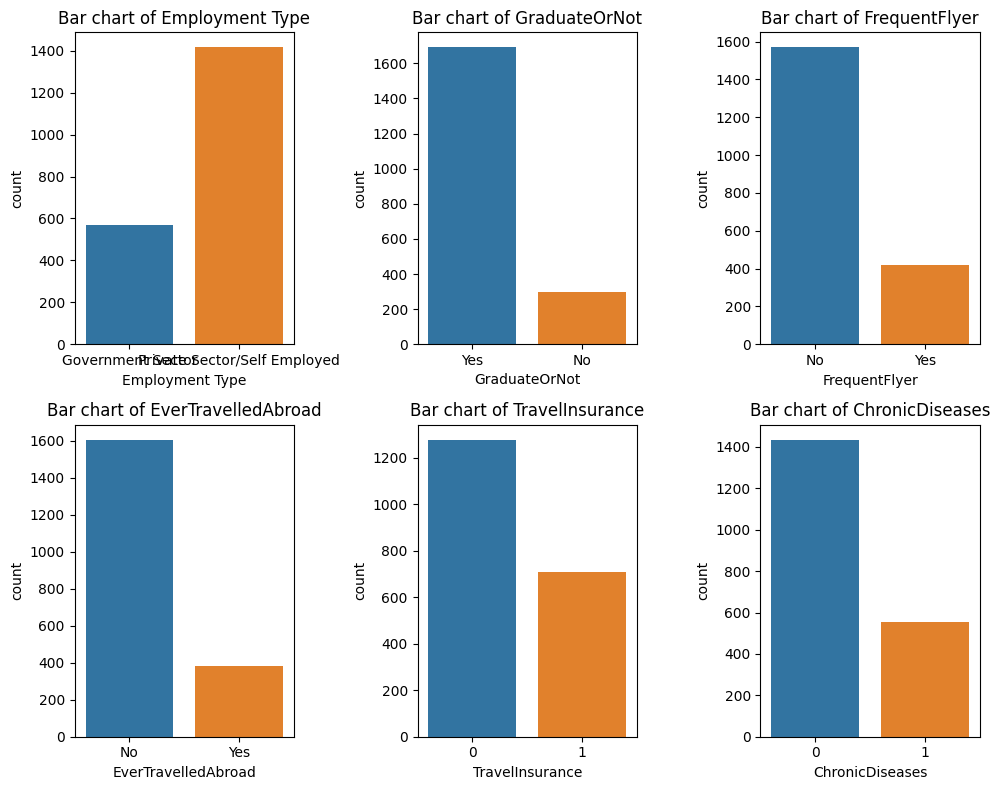

In [37]:
fig, ax = plt.subplots(categorical_cols.shape[0], categorical_cols.shape[1], figsize = (10,8))

for i in range(categorical_cols.shape[0]):
    for j in range(categorical_cols.shape[1]):
        if categorical_cols[i, j] == '':
            continue
        sns.countplot(data = df, x = categorical_cols[i,j], ax = ax[i, j])
        ax[i, j].set_title('Bar chart of ' + categorical_cols[i,j])

plt.tight_layout()
plt.show()

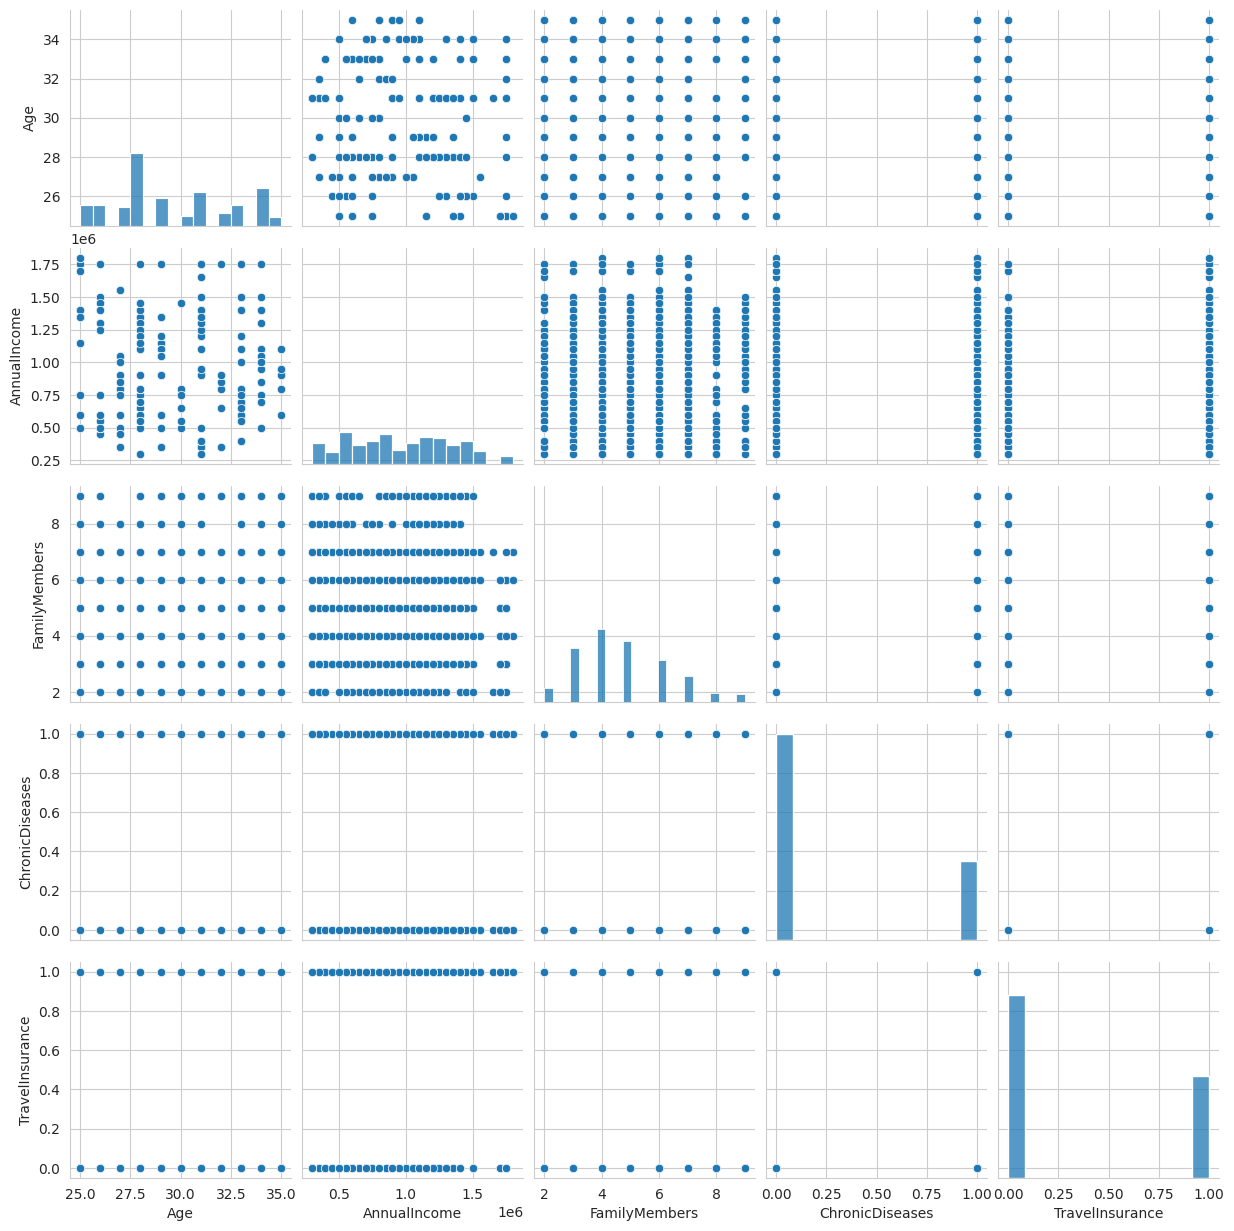

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

<ipython-input-88-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

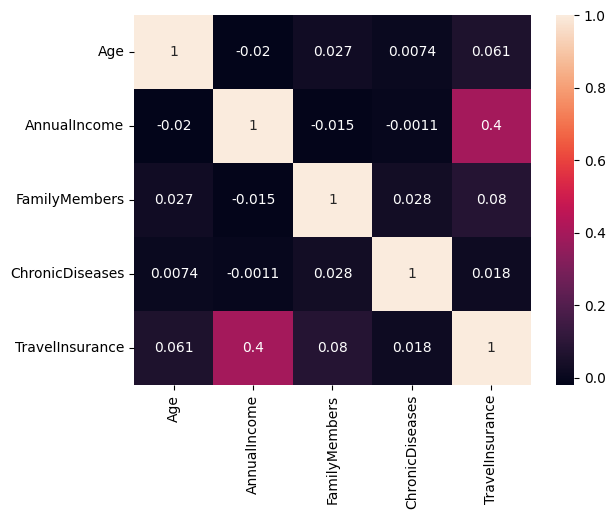

In [ ]:
sns.heatmap(df.corr(), annot = True)

There are no correlation between them =)) only TravelInsurance have moderate correlation with AnnualIncome

# Feature Engineering

In [6]:
preprocess_df = df.copy()

## Feature crossing

In [44]:
preprocess_df.groupby('GraduateOrNot')['AnnualIncome'].mean()

GraduateOrNot
No     835254.237288
Yes    949763.593381
Name: AnnualIncome, dtype: float64

divide AnnualIncome to smaller value to avoid large(less) weight parameter for this feature in model and create new feature crossing by AnnualIncome per Age

In [7]:
preprocess_df['AnnualIncome'] = (preprocess_df['AnnualIncome'] / 1000).astype(int)
preprocess_df['Income_per_age'] = preprocess_df['AnnualIncome'] / preprocess_df['Age']
preprocess_df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Income_per_age
0,31,Government Sector,Yes,400,6,1,No,No,0,12.903226
1,31,Private Sector/Self Employed,Yes,1250,7,0,No,No,0,40.322581
2,34,Private Sector/Self Employed,Yes,500,4,1,No,No,1,14.705882
3,28,Private Sector/Self Employed,Yes,700,3,1,No,No,0,25.000000
4,28,Private Sector/Self Employed,Yes,700,8,1,Yes,No,0,25.000000
...,...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500,4,0,Yes,Yes,1,45.454545
1983,28,Private Sector/Self Employed,Yes,1750,5,1,No,Yes,0,62.500000
1984,28,Private Sector/Self Employed,Yes,1150,6,1,No,No,0,41.071429
1985,34,Private Sector/Self Employed,Yes,1000,6,0,Yes,Yes,1,29.411765


## Encoding

Cause these categorical features are nominal so I use One Hot Encoding 

In [8]:
preprocess_df = pd.get_dummies(preprocess_df, prefix = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']\
                               ,columns = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad'])
preprocess_df

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Income_per_age,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400,6,1,0,12.903226,1,0,0,1,1,0,1,0
1,31,1250,7,0,0,40.322581,0,1,0,1,1,0,1,0
2,34,500,4,1,1,14.705882,0,1,0,1,1,0,1,0
3,28,700,3,1,0,25.000000,0,1,0,1,1,0,1,0
4,28,700,8,1,0,25.000000,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1500,4,0,1,45.454545,0,1,0,1,0,1,0,1
1983,28,1750,5,1,0,62.500000,0,1,0,1,1,0,0,1
1984,28,1150,6,1,0,41.071429,0,1,0,1,1,0,1,0
1985,34,1000,6,0,1,29.411765,0,1,0,1,0,1,0,1


## Handling Imbalanced Data

In [ ]:
# from imblearn.over_sampling import SMOTE
# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# oversampled_X, oversampled_Y = sm.fit_resample(preprocess_df.drop('TravelInsurance', axis=1), preprocess_df['TravelInsurance'])
# oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

# preprocess_df = oversampled.copy()

## Feature Selection

In [9]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = preprocess_df.drop(['TravelInsurance'], axis = 1)
Y = preprocess_df['TravelInsurance']

I use ExtraTreesClassifier to auto ranking features for classification model

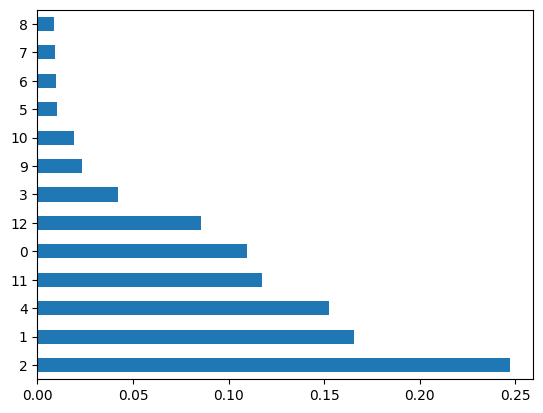

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
# print(model.feature_importances_)
f_importance = pd.DataFrame({'Feature_Name': X.columns, 'Weight_Importance': model.feature_importances_})
feat = pd.Series(model.feature_importances_)
feat = feat.reindex(range(len(feat)))
feat.nlargest(13).plot(kind = 'barh')
plt.show()

In [11]:
f_importance

,Feature_Name,Weight_Importance
0,Age,0.109877
1,AnnualIncome,0.165593
2,FamilyMembers,0.247166
3,ChronicDiseases,0.042376
4,Income_per_age,0.152490
5,Employment Type_Government Sector,0.009970
6,Employment Type_Private Sector/Self Employed,0.009449
7,GraduateOrNot_No,0.009024
8,GraduateOrNot_Yes,0.008790
9,FrequentFlyer_No,0.023040


Following that ranking board I will drop features corresponding to indices from 5 to 10

In [232]:
# X = X.drop(X.iloc[:,5:11], axis = 1)

I have tried FeatureSelector from tool AutoFeat but It return few features so I dont wanna follow this tool

In [ ]:
# !pip install AutoFeat

In [128]:
# from autofeat import FeatureSelector
# fsel = FeatureSelector(problem_type = 'classification',featsel_runs = 20, verbose=1)
# new_X = fsel.fit_transform(pd.DataFrame(X), pd.DataFrame(Y))
# new_X

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[featsel] Scaling data...done.
[featsel] Feature selection run 1/20
[featsel] Feature selection run 2/20
[featsel] Feature selection run 3/20
[featsel] Feature selection run 4/20
[featsel] Feature selection run 5/20
[featsel] Feature selection run 6/20
[featsel] Feature selection run 7/20
[featsel] Feature selection run 8/20
[featsel] Feature selection run 9/20
[featsel] Feature selection run 10/20
[featsel] Feature selection run 11/20
[featsel] Feature selection run 12/20
[featsel] Feature selection run 13/20
[featsel] Feature selection run 14/20
[featsel] Feature selection run 15/20
[featsel] Feature selection run 16/20
[featsel] Feature selection run 17/20
[featsel] Feature selection run 18/20
[featsel] Feature selection run 19/20
[featsel] Feature selection run 20/20
[featsel] 3 features after 20 feature selection runs
[featsel] 2 features after correlation filtering
[featsel] 2 features after noise filtering


,AnnualIncome,EverTravelledAbroad_No
0,400,1
1,1250,1
2,500,1
3,700,1
4,700,1
...,...,...
1982,1500,0
1983,1750,0
1984,1150,1
1985,1000,0


# Naive Bayes machine learning model

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                        confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

def evaluate_model(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    """
    print("accuracy", accuracy_score(y_true, y_pred))
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))
    print("ROC_AUC ", roc_auc_score(y_true, y_pred))

    report = classification_report(y_true, y_pred)
    print("Classification Report\n",report)

    cm = confusion_matrix(y_true,y_pred)
	# tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Positive','Negative'])
    cm_display.plot()
    plt.show()
    
    compare_df = pd.DataFrame({'Actual': y_true, 'Predict': y_pred})
    print(compare_df)

In [15]:
def kfold_save_model(model_chosen, X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state = 42)
    best_score = 0
    best_dataset = None
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        print(f'Fold {i+1}th in total {n_splits} Fold')
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Build model with Data train
        model = model_chosen(X_train, y_train)

        # Evaluate
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)
        # score = model.score(X_test, y_test)

        # save best model and data train with best score
        if score > best_score:
            best_score = score
            best_dataset = (X_train, X_test, y_train, y_test)
            best_model = model
    
    # Train your best model using the best dataset (X_train, y_train) and return the trained model
    print('Taking best model with best data train')
    X_train_best, _, y_train_best, _ = best_dataset
    best_model.fit(X_train_best, y_train_best)
    print("Best parameter (CV score=%0.3f):" % model.best_score_)
    print(model.best_params_)   
    
    return best_model, best_dataset

## Complement Naive Bayes

In [16]:
def build_model_ComplementNB(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """    
    pipe = Pipeline(steps=[ ("scaler", MinMaxScaler()), ("NB", ComplementNB())], verbose = True) 
    alpha = np.arange(0, 2.01, 0.05)
    force_alpha = [False, True]
    # components = np.arange(1, 10, 1)
    param_grid = {
        # "pca__n_components": components,
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'NB__alpha': alpha,
        'NB__force_alpha': force_alpha
        }
    model = GridSearchCV(pipe, param_grid, scoring = 'precision', n_jobs = 4)
    # Todo: fit your model with X, y
    model.fit(X, y)

    return model

In [17]:
%%time
model, dataset = kfold_save_model(build_model_ComplementNB, X, Y, 10)

X_train, X_test, Y_train, Y_test = dataset
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

Fold 1th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 2th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 3th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 4th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 5th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 6th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 7th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 8th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 9th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 10th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Taking best model with best data train
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.650):
{'NB__alpha': 0.0, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
CPU times: user 9.62 s, sys: 383 ms, total: 10 s
Wall time: 1min 32s


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
410 fits failed out of a total of 820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
410 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/na

((1788, 13), (199, 13), (1788,), (199,))

### MinMaxScaler + NB

accuracy 0.7738693467336684
precision 0.6575342465753424
recall 0.7058823529411765
F1 0.6808510638297872
ROC_AUC  0.757521329142344
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       131
           1       0.66      0.71      0.68        68

    accuracy                           0.77       199
   macro avg       0.75      0.76      0.75       199
weighted avg       0.78      0.77      0.78       199



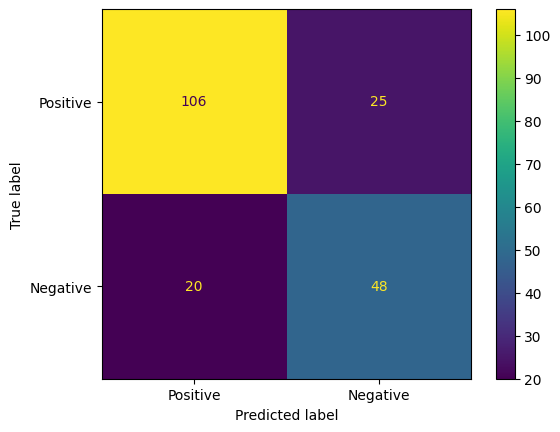

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       1        1
1947       0        0
1953       0        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [18]:
# model = build_model_ComplementNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

accuracy 0.7197986577181208
precision 0.5133437990580848
recall 0.6312741312741312
F1 0.5662337662337663
ROC_AUC  0.6935898215425774
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1270
           1       0.51      0.63      0.57       518

    accuracy                           0.72      1788
   macro avg       0.67      0.69      0.68      1788
weighted avg       0.74      0.72      0.73      1788



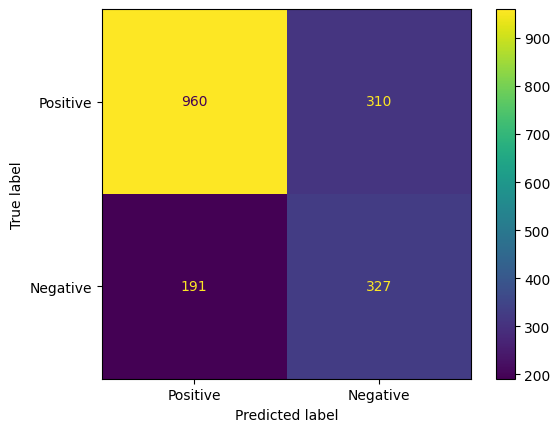

      Actual  Predict
0          0        0
1          0        0
2          0        1
3          0        0
4          1        0
...      ...      ...
1982       1        1
1983       1        0
1984       0        0
1985       1        1
1986       0        0

[1788 rows x 2 columns]


In [19]:
y_pred = model.predict(X_train)
evaluate_model(y_pred, Y_train)

## Gaussian Naive Bayes

In [20]:
def build_model_GaussianNB(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """    
    pipe = Pipeline(steps=[ ("NB", GaussianNB())], verbose = True) 
    var_smoothing_values = np.logspace(-1, -9, num=200)
    # components = np.arange(1, 10, 1)
    param_grid = {
        # 'pca__n_components': components,
        # "scaler__feature_range": [(-1, 1), (0, 1)],
        'NB__var_smoothing': var_smoothing_values
        }
    model = GridSearchCV(pipe, param_grid, scoring = 'precision', n_jobs = 3)
    # Todo: fit your model with X, y
    model.fit(X, y)

    return model

In [21]:
%%time
model, dataset = kfold_save_model(build_model_GaussianNB, X, Y, 10)

X_train, X_test, Y_train, Y_test = dataset
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

Fold 1th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 2th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 3th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 4th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 5th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 6th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 7th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 8th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 9th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Fold 10th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Taking best model with best d

((1788, 13), (199, 13), (1788,), (199,))

### GaussianNB 

accuracy 0.8341708542713567
precision 0.6027397260273972
recall 0.9166666666666666
F1 0.7272727272727272
ROC_AUC  0.8623068432671082
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       151
           1       0.60      0.92      0.73        48

    accuracy                           0.83       199
   macro avg       0.79      0.86      0.80       199
weighted avg       0.88      0.83      0.84       199



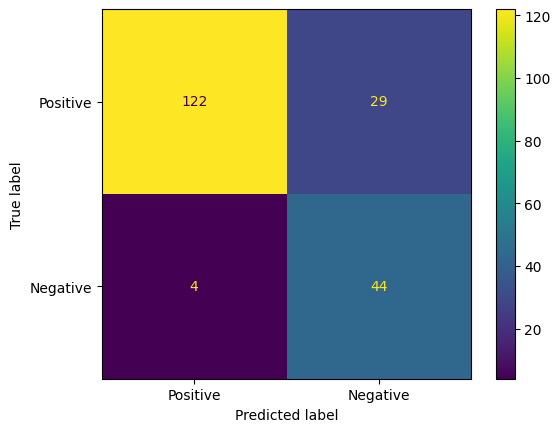

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       1        1
1947       0        0
1953       1        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [175]:
# model = build_model_GaussianNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

accuracy 0.785234899328859
precision 0.47566718995290425
recall 0.8583569405099151
F1 0.6121212121212122
ROC_AUC  0.8128021636347484
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      1435
           1       0.48      0.86      0.61       353

    accuracy                           0.79      1788
   macro avg       0.72      0.81      0.73      1788
weighted avg       0.86      0.79      0.80      1788



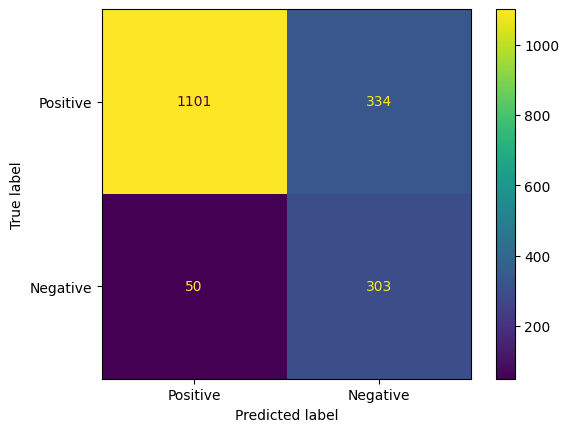

      Actual  Predict
0          0        0
1          0        0
2          0        1
3          0        0
4          0        0
...      ...      ...
1982       1        1
1983       1        0
1984       0        0
1985       1        1
1986       0        0

[1788 rows x 2 columns]


In [176]:
y_pred = model.predict(X_train)
evaluate_model(y_pred, Y_train)

### PCA + StandardScaler + NB 

accuracy 0.7939698492462312
precision 0.6164383561643836
recall 0.7758620689655172
F1 0.6870229007633589
ROC_AUC  0.7886402543409147
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       141
           1       0.62      0.78      0.69        58

    accuracy                           0.79       199
   macro avg       0.76      0.79      0.77       199
weighted avg       0.82      0.79      0.80       199



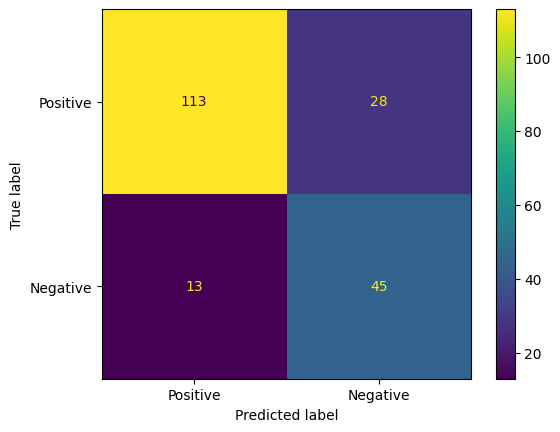

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       0        1
1947       0        0
1953       1        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [205]:
# model = build_model_GaussianNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

accuracy 0.7678970917225951
precision 0.5227629513343799
recall 0.75
F1 0.6160962072155411
ROC_AUC  0.761904761904762
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1344
           1       0.52      0.75      0.62       444

    accuracy                           0.77      1788
   macro avg       0.71      0.76      0.72      1788
weighted avg       0.81      0.77      0.78      1788



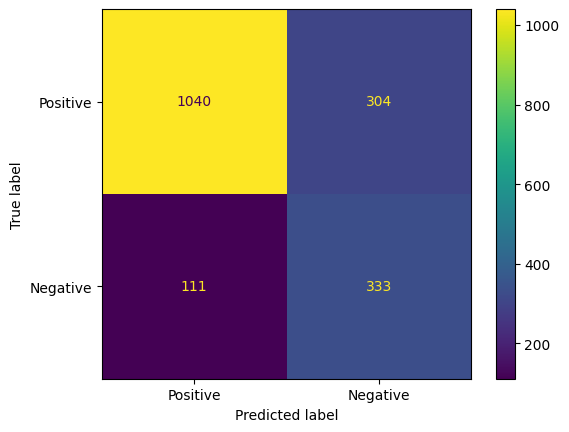

      Actual  Predict
0          0        0
1          1        0
2          0        1
3          0        0
4          0        0
...      ...      ...
1982       1        1
1983       1        0
1984       0        0
1985       0        1
1986       0        0

[1788 rows x 2 columns]


In [206]:
y_pred = model.predict(X_train)
evaluate_model(y_pred, Y_train)

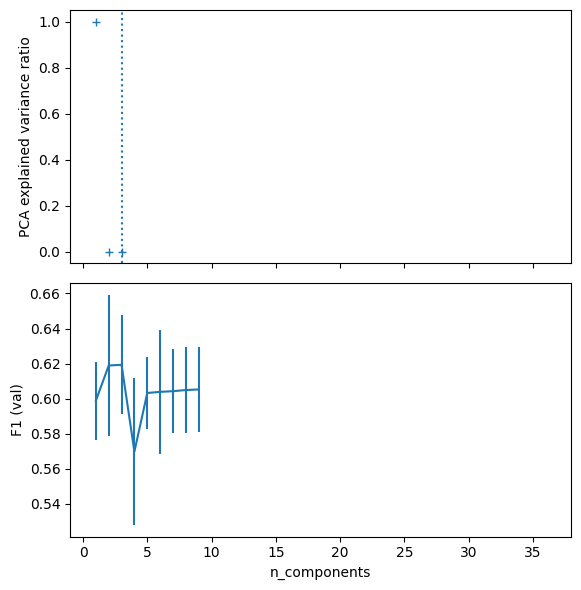

In [208]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, model.best_estimator_.named_steps["pca"].n_components_ + 1), model.best_estimator_.named_steps["pca"].explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    model.best_estimator_.named_steps["pca"].n_components_,
    linestyle=":",
    label="n_components chosen",
)
# For each number of components, find the best classifier results
results = pd.DataFrame(model.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("F1 (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 38)

plt.tight_layout()
plt.show()

## Bernoulli Naive Bayes

In [32]:
def build_model_BernoulliNB(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """    
    pipe = Pipeline(steps=[ ("scaler", MinMaxScaler()), ("NB", BernoulliNB())], verbose = True) 
    alpha = np.arange(0, 1.01, 0.05)
    binarize = np.arange(0.1, 1.01, 0.1)
    force_alpha = [False, True]
    # components = np.arange(1, 10, 1)
    param_grid = {
        # "pca__n_components": components,
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'NB__alpha': alpha,
        'NB__force_alpha': force_alpha,
        'NB__binarize': binarize
        }
    model = GridSearchCV(pipe, param_grid, n_jobs = 5)
    # Todo: fit your model with X, y
    model.fit(X, y)

    return model

In [33]:
%%time
model, dataset = kfold_save_model(build_model_BernoulliNB, X, Y, 10)

X_train, X_test, Y_train, Y_test = dataset
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

Fold 1th in total 10 Fold
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 2th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 3th in total 10 Fold
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 4th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 5th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 6th in total 10 Fold
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 7th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 8th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 9th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Fold 10th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Taking best model with best data train


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.761):
{'NB__alpha': 0.0, 'NB__binarize': 0.7000000000000001, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
CPU times: user 49.1 s, sys: 1.76 s, total: 50.8 s
Wall time: 7min 14s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


((1788, 13), (199, 13), (1788,), (199,))

### MinMaxScaler + NB

accuracy 0.8241206030150754
precision 0.6301369863013698
recall 0.8518518518518519
F1 0.7244094488188976
ROC_AUC  0.8328224776500639
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       145
           1       0.63      0.85      0.72        54

    accuracy                           0.82       199
   macro avg       0.78      0.83      0.80       199
weighted avg       0.85      0.82      0.83       199



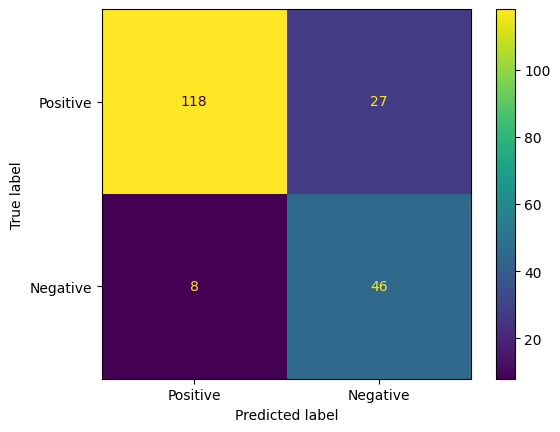

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       1        1
1947       0        0
1953       0        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [34]:
# model = build_model_BernoulliNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

accuracy 0.7667785234899329
precision 0.4976452119309262
recall 0.7657004830917874
F1 0.6032350142721218
ROC_AUC  0.7664019154905807
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.77      0.83      1374
           1       0.50      0.77      0.60       414

    accuracy                           0.77      1788
   macro avg       0.71      0.77      0.72      1788
weighted avg       0.82      0.77      0.78      1788



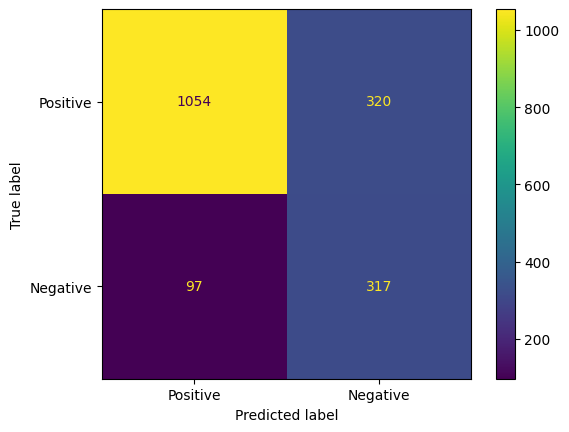

      Actual  Predict
0          0        0
1          1        0
2          0        1
3          0        0
4          0        0
...      ...      ...
1982       1        1
1983       1        0
1984       0        0
1985       1        1
1986       0        0

[1788 rows x 2 columns]


In [148]:
y_pred = model.predict(X_train)
evaluate_model(y_pred, Y_train)

### PCA + MinMaxscaler + NB

accuracy 0.8140703517587939
precision 0.5205479452054794
recall 0.95
F1 0.6725663716814159
ROC_AUC  0.864937106918239
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       159
           1       0.52      0.95      0.67        40

    accuracy                           0.81       199
   macro avg       0.75      0.86      0.77       199
weighted avg       0.89      0.81      0.83       199



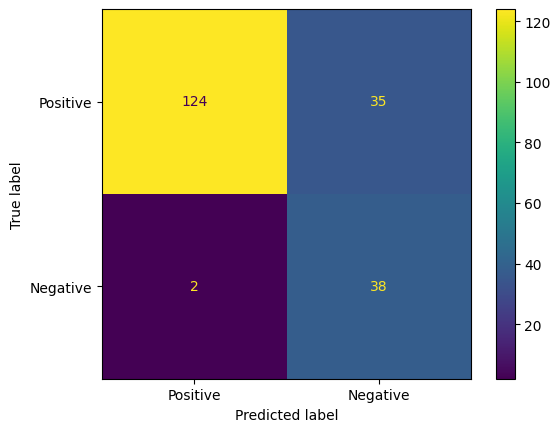

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       0        1
1947       0        0
1953       0        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [112]:
# model = build_model_BernoulliNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

accuracy 0.7824384787472036
precision 0.434850863422292
recall 0.9052287581699346
F1 0.5874867444326618
ROC_AUC  0.8311568892064247
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.76      0.85      1482
           1       0.43      0.91      0.59       306

    accuracy                           0.78      1788
   macro avg       0.70      0.83      0.72      1788
weighted avg       0.88      0.78      0.81      1788



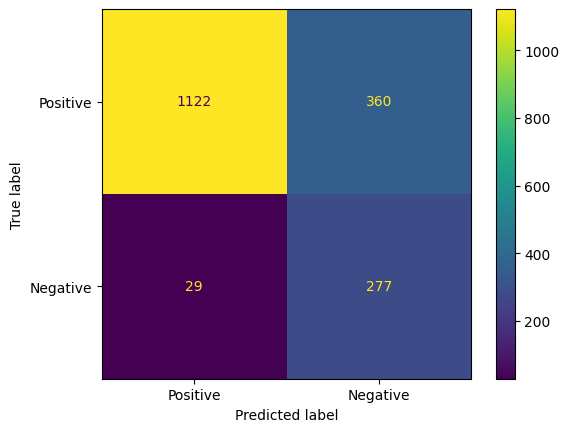

      Actual  Predict
0          0        0
1          0        0
2          0        1
3          0        0
4          0        0
...      ...      ...
1982       1        1
1983       1        0
1984       0        0
1985       0        1
1986       0        0

[1788 rows x 2 columns]


In [111]:
y_pred = model.predict(X_train)
evaluate_model(y_pred, Y_train)

## Multinomial Naive Bayes

In [26]:
def build_model_MultinomialNB(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """    
    pipe = Pipeline(steps=[("scaler", MinMaxScaler()), ("NB", MultinomialNB())], verbose = True) 
    alpha = np.arange(0, 5.01, 0.05)
    # components = np.arange(1, 10, 1)
    force_alpha = [False, True]
    param_grid = {
        # "pca__n_components": components,
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'NB__alpha': alpha,
        'NB__force_alpha': force_alpha
        }
    model = GridSearchCV(pipe, param_grid, scoring ="f1", n_jobs = 3)
    # Todo: fit your model with X, y
    model.fit(X, y)
    print("Best parameter (CV score=%0.3f):" % model.best_score_)
    print(model.best_params_)   

    return model

In [27]:
%%time
model, dataset = kfold_save_model(build_model_MultinomialNB, X, Y, 10)

X_train, X_test, Y_train, Y_test = dataset
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

Fold 1th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.581):
{'NB__alpha': 1.8, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 2th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.587):
{'NB__alpha': 4.55, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 3th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.592):
{'NB__alpha': 4.3500000000000005, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 4th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.574):
{'NB__alpha': 4.25, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 5th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.582):
{'NB__alpha': 3.85, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 6th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.583):
{'NB__alpha': 4.8500000000000005, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 7th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.590):
{'NB__alpha': 4.6000000000000005, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 8th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.580):
{'NB__alpha': 4.4, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 9th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.587):
{'NB__alpha': 4.8500000000000005, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Fold 10th in total 10 Fold


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.586):
{'NB__alpha': 4.6000000000000005, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
Taking best model with best data train
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing NB, total=   0.0s
Best parameter (CV score=0.586):
{'NB__alpha': 4.6000000000000005, 'NB__force_alpha': False, 'scaler__feature_range': (0, 1)}
CPU times: user 17 s, sys: 525 ms, total: 17.5 s
Wall time: 2min 55s


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1010 fits failed out of a total of 2020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1010 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

((1788, 13), (199, 13), (1788,), (199,))

### MinMaxScaler + NB

accuracy 0.8040201005025126
precision 0.5753424657534246
recall 0.84
F1 0.6829268292682927
ROC_AUC  0.815973154362416
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       149
           1       0.58      0.84      0.68        50

    accuracy                           0.80       199
   macro avg       0.76      0.82      0.77       199
weighted avg       0.85      0.80      0.81       199



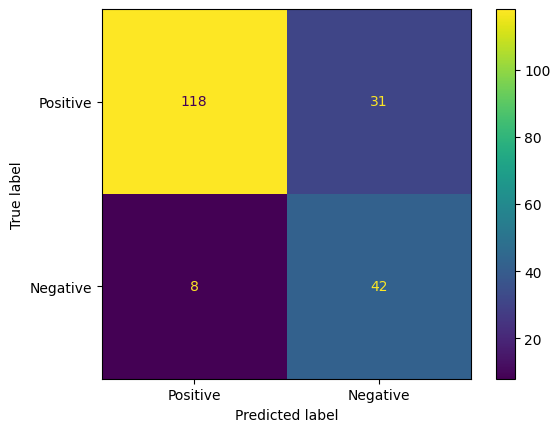

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       1        1
1947       0        0
1953       0        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [28]:
# model = build_model_CategoricalNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

accuracy 0.7522371364653244
precision 0.4317111459968603
recall 0.7724719101123596
F1 0.553877139979859
ROC_AUC  0.759839307011487
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      1432
           1       0.43      0.77      0.55       356

    accuracy                           0.75      1788
   macro avg       0.68      0.76      0.69      1788
weighted avg       0.83      0.75      0.77      1788



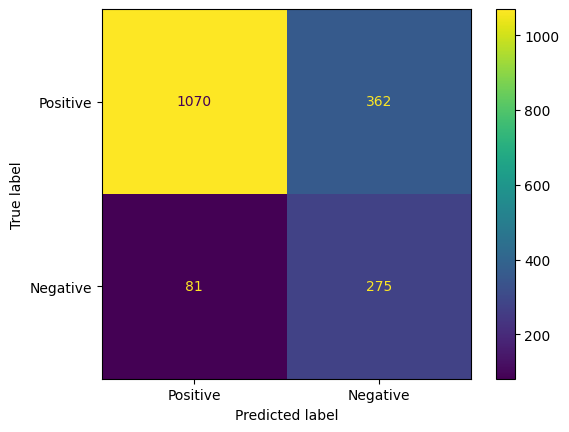

      Actual  Predict
0          0        0
1          0        0
2          0        1
3          0        0
4          0        0
...      ...      ...
1982       1        1
1983       1        0
1984       0        0
1985       1        1
1986       0        0

[1788 rows x 2 columns]


In [140]:
y_pred = model.predict(X_train)
evaluate_model(y_pred, Y_train)

## Categorical Naive Bayes

In [29]:
def build_model_CategoricalNB(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """    
    pipe = Pipeline(steps=[ ("NB", CategoricalNB())], verbose = True) 
    alpha = np.arange(0, 5.01, 0.05)
    # components = np.arange(1, 10, 1)
    force_alpha = [False, True]
    param_grid = {
        # "pca__n_components": components,
        # "scaler__feature_range": [(-1, 1), (0, 1)],
        'NB__alpha': alpha,
        'NB__force_alpha': force_alpha
        }
    model = GridSearchCV(pipe, param_grid, scoring ="f1", n_jobs = 2)
    # Todo: fit your model with X, y
    model.fit(X, y)
    print("Best parameter (CV score=%0.3f):" % model.best_score_)
    print(model.best_params_)   

    return model

In [30]:
%%time
model, dataset = kfold_save_model(build_model_CategoricalNB, X, Y, 10)

X_train, X_test, Y_train, Y_test = dataset
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

Fold 1th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Best parameter (CV score=0.593):
{'NB__alpha': 1.55, 'NB__force_alpha': False}
Fold 2th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Best parameter (CV score=0.602):
{'NB__alpha': 1.6, 'NB__force_alpha': False}
Fold 3th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Best parameter (CV score=0.607):
{'NB__alpha': 4.2, 'NB__force_alpha': False}
Fold 4th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Best parameter (CV score=0.585):
{'NB__alpha': 4.4, 'NB__force_alpha': False}
Fold 5th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Best parameter (CV score=0.607):
{'NB__alpha': 3.1, 'NB__force_alpha': False}
Fold 6th in total 10 Fold
[Pipeline] ................ (step 1 of 1) Processing NB, total=   0.0s
Best parameter (CV score=0.

((1788, 13), (199, 13), (1788,), (199,))

accuracy 0.8140703517587939
precision 0.6027397260273972
recall 0.8461538461538461
F1 0.7040000000000001
ROC_AUC  0.8244374672946102
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       147
           1       0.60      0.85      0.70        52

    accuracy                           0.81       199
   macro avg       0.77      0.82      0.78       199
weighted avg       0.85      0.81      0.82       199



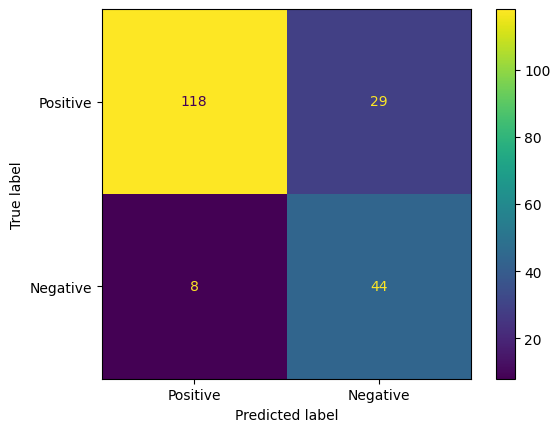

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       1        1
1947       0        0
1953       0        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [31]:
# model = build_model_CategoricalNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

### CategoricalNB with feature selection

accuracy 0.8140703517587939
precision 0.5616438356164384
recall 0.8913043478260869
F1 0.6890756302521008
ROC_AUC  0.8410770105143506
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       153
           1       0.56      0.89      0.69        46

    accuracy                           0.81       199
   macro avg       0.76      0.84      0.78       199
weighted avg       0.87      0.81      0.83       199



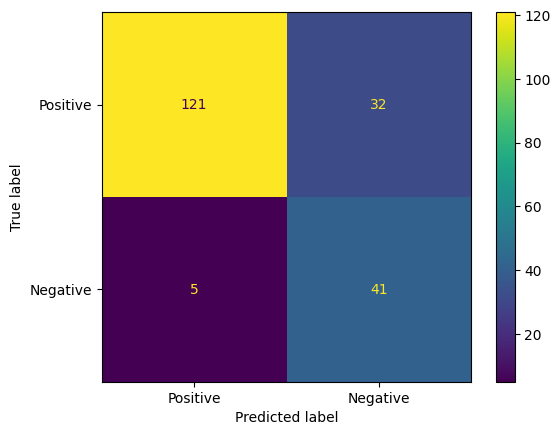

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       1        1
1947       0        0
1953       0        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [246]:
# model = build_model_CategoricalNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

accuracy 0.767337807606264
precision 0.4725274725274725
recall 0.7900262467191601
F1 0.5913555992141454
ROC_AUC  0.7756101382849532
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.76      0.84      1407
           1       0.47      0.79      0.59       381

    accuracy                           0.77      1788
   macro avg       0.70      0.78      0.71      1788
weighted avg       0.83      0.77      0.78      1788



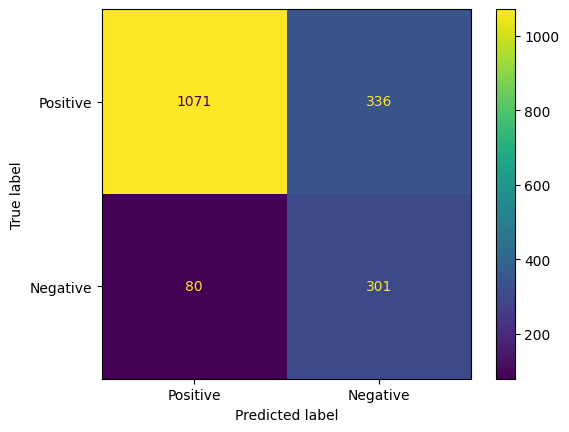

      Actual  Predict
0          0        0
1          0        0
2          0        1
3          0        0
4          0        0
...      ...      ...
1982       1        1
1983       1        0
1984       0        0
1985       1        1
1986       0        0

[1788 rows x 2 columns]


In [247]:
y_pred = model.predict(X_train)
evaluate_model(y_pred, Y_train)

### CategoricalNB without feature selection

accuracy 0.8140703517587939
precision 0.589041095890411
recall 0.86
F1 0.6991869918699187
ROC_AUC  0.8293288590604027
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.80      0.87       149
           1       0.59      0.86      0.70        50

    accuracy                           0.81       199
   macro avg       0.77      0.83      0.78       199
weighted avg       0.86      0.81      0.82       199



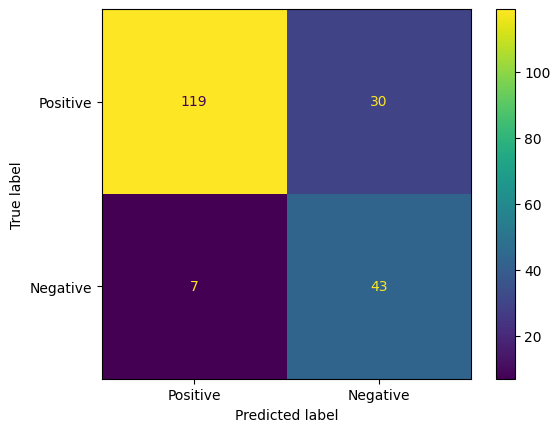

      Actual  Predict
6          0        0
18         0        1
31         0        0
48         0        0
54         0        0
...      ...      ...
1946       1        1
1947       0        0
1953       0        1
1959       0        0
1972       0        0

[199 rows x 2 columns]


In [107]:
# model = build_model_CategoricalNB(X_train, Y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, Y_test)

accuracy 0.7656599552572707
precision 0.4945054945054945
recall 0.7645631067961165
F1 0.6005719733079122
ROC_AUC  0.7652757394445698
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.77      0.83      1376
           1       0.49      0.76      0.60       412

    accuracy                           0.77      1788
   macro avg       0.71      0.77      0.72      1788
weighted avg       0.82      0.77      0.78      1788



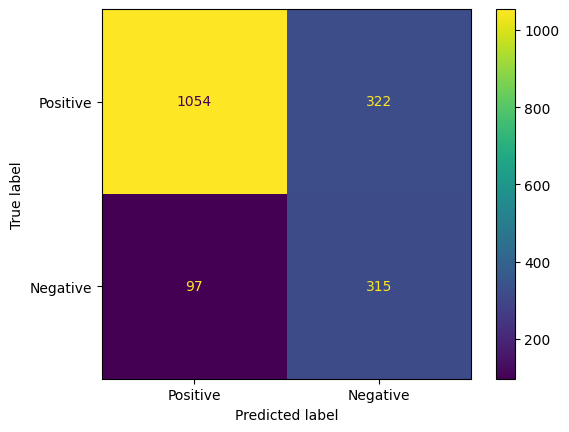

      Actual  Predict
0          0        0
1          0        0
2          0        1
3          0        0
4          0        0
...      ...      ...
1982       1        1
1983       1        0
1984       0        0
1985       1        1
1986       0        0

[1788 rows x 2 columns]


In [103]:
y_pred = model.predict(X_train)
evaluate_model(y_pred, Y_train)

# Conclusion

Here are some case in each Naive Bayes Machine Learning model for this dataset (with using K-fold cross-validation and GridSearchCV for tuning hyperparameter):

*   Complement best with pipeline (MinMaxScaler - ComplementNB) and it poor with feature selection
*   GaussianNB have higher performance without PCA and Scaler than using PCA and Scaler about ~4% Precision and GaussianNB good at dataset that using feature selection
*   BernoulliNB kinda poor with feature selection, it drop Precision about 10% I have no idea with this case =)) And pipeline that use PCA or not are have same performance
*   MultinomialNB have performance better(~2% Precision) without feature selection than use feature selection. Moreover, PCA make pipeline worse than only use MinMaxScaler and MultinomialNB
*   CategoricalNB have best performance without using Scaler and PCA, PCA make it poor and only predict 1 label like it predict in case imbalanced data. Additionally, using feature selection to apply this model have performance same as model without using feature selection
*   GaussianNB, BernoulliNB, and CategoricalNB is kinda good at this dataset more than others



Finally, I choose the main metric Precision score because the target is offering customer so False Positive is important, we wanna offering most customers who are interested in Travel Insurance even if someone doesn't pay attention to it, it does not affect anything bad. The best pipeline I have experimented is only GaussianNB without feature selection =)) that Precision score = 80%